In [6]:
import sys, os
sys.path.append("/Users/jsha/gjai/nlp/pytest/base/dataset/")
from mnist import load_mnist
import numpy as np

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                  one_hot_label=True)
print("x_train.shape:", x_train.shape)
print("t_train.shape:", t_train.shape)

x_train.shape: (60000, 784)
t_train.shape: (60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[52242 46982 37734 52950 30311  6540 41654 39481   344 55042]


In [10]:
t_batch

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

# 연습문제1. 다음 중 가장 적절한 학습 상태를 표현한 상태는 무엇이며 그 상태가 가장 적절한 이유는 무엇인지 설명하시오.

- 2번. 데이터의 트렌드를 가장 잘 쫓아감. 1은 전체 데이터를 대변하지 못하고, 3은 너무 세세한 부분까지 설명하고 있어 새로운 데이터가 들어왔을 때 잘못 예측할 확률이 높다.

# 연습문제2. 다음은 평균제곱오차(MSE) 수식과 관련 코드이다. 수식의 의미를 코드를 이용하여 설명하시오.

- 모든 데이터에 대하여 인공지능에서 예측하는 결과값과 실제 결과값의 차이의 제곱하여 더하고 이를 반으로 나눈 값.
- 예측값과 실제값이 크면 클수록 오차값인 MSE 수치가 높아지는 걸 알 수 있다.

# 연습문제3. 다음은 교차 엔트로피 오차(CEE) 관련 코드이다. 이 코드의 계산 과정을 설명하시오.

1. 모델의 예측값은 0~1 사이의 확률로 표현되고, 실제값은 정답인 레이블은 1, 나머지는 모두 0으로 표현된다.
2. log(예측값)은 예측값이 0이 아닌 이상 어떤 수치를 가지게 되지만, 이에 곱해지는 실제값이 정답이 아닌 경우에는 모두 0이 되어 버린다. 결국 데이터마다 실제값이 1인 경우에만 계산다.
3. 그리고 여기에 (-) 기호가 곱하고 이를 각 데이터마다 더한값이 최종 오차가 된다.
4. 만약 실제값에 대해 높은 확률로 예측하게 되면 (-)기호로 인해 오차값이 낮아지게 되고, 실제값에 대해 낮은 확률로 예측하게 되면, 오차값이 높아진다.

# 연습문제 4. 손실함수가 쓰이는 곳과, 손실함수를 설정해야 하는 이유를 설명하시오. 특히, 손실함수의 입력값으로 정답 레이블과 신경망의 출력이 들어오는데, 정답 레이블과 신경망의 출력이 갖는 값의 의미, 그리고 이 둘이 손실함수에서 어떠한 연산을 하게 되는지 설명하시오.

- 손실함수를 사용하는 이유는 모델의 예측값과 실제값을 비교하여 그 차이를 줄일 수 있도록 모델을 개선시키기 위함이다. 손실함수의 오차값이 줄어드는 방향으로 모델의 가중치를 계산하여 적용시킬 수 있다.
- 손실함수마다 세부 연산 내용이 다를 수 있지만, 결국 신경망의 출력인 예측값과 레이블 값이 실제값이 얼마나 차이가 나는지를 확인하고 이를 줄일 수 있는 방법을 찾는다는 목적은 동일하다.

# Numerical differentiation

In [11]:
def numerical_diff(f, x):
    h = 0.00001
    return (f(x+h) - f(x)) / h

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.2*x

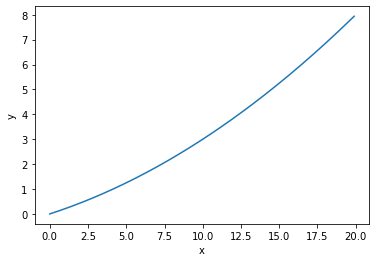

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0., 20., 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [14]:
numerical_diff(function_1, 5)

0.3000001000064145

In [15]:
numerical_diff(function_1, 10)

0.40000009997598335

### 해석
- function_1이 loss_function이라고 가정하면, x가 5에서 10으로 이동할때, 기울기가 0.3에서 0.4로 증가했다.
- 기울기가 커졌다는 건, loss_function 즉 오차가 커졌다는 것.
- 그래서 5에서 10으로 가면 안되고, 5에서 1이나 2, 3으로 가야한다.
- 오차가 줄어드는 방향으로 가야하기 때문에.

# Gradient Descent
- 실제 현상은 복잡하고, 매개변수가 많아 모델이 실제로 가질 수 있는 모든 오차값을 조사하여 최소값을 직접 알아내기 어려움. 따라서 직접 최소값을 찾기보다 간접적으로라도 최소값의 방향을 알려주는 방법을 모색함.
- 우리는 loss function이 최소가 되는 지점을 찾고 싶다.
- 그곳은 기울기가 0인 지점이며, 더 이상 오차가 낮아질 수 없는 단계일 것.
- 단, 그곳이 지역해일 수 있으며, 전역해를 찾기 위해서는 random하게 살피거나, 학습률을 조절하는 방법을 써야 한다.


## 편미분

In [21]:
def function_2_partial1(x0):
    return x0**2 + 4.0**2

def function_2_partial2(x1):
    return 3.0**2 + x1**2

In [22]:
numerical_diff(function_2_partial1, 3.0)

6.000009999951316

In [23]:
numerical_diff(function_2_partial2, 4.0)

8.00000999952033

# Gradient

In [24]:
def numerical_diff(f, x):
    h = 0.0001
    return (f(x+h) - f(x)) / h

In [28]:
import numpy as np

def numerical_gradient(f, x):
    h = 0.0001
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val + h
        fxh1 = f(x)
        
        x[index] = tmp_val
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / h
        
    return np.round(grad, 3)

In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [30]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [33]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [32]:
numerical_gradient(function_2, np.array([0.0, 1.0]))

array([0., 2.])

## gradient descent

In [34]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x, np.array(x_history)

In [36]:
init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 100

x, x_history = gradient_descent(function_2, init_x, lr, step_num)
print(x)

[-0.0002  0.0001]


## 학습률이 너무 크면?

In [39]:
init_x = np.array([-3., 4.])
lr = 10.0
step_num = 100

x, x_history = gradient_descent(function_2, init_x, lr, step_num)
print('최종 수렴값:', x)
print('x_history:\n', x_history[::5])

최종 수렴값: [ 9.97599663e+11 -1.19059582e+12]
x_history:
 [[-3.00000000e+00  4.00000000e+00]
 [ 7.42829969e+06 -9.90439349e+06]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]
 [ 9.97599663e+11 -1.19059582e+12]]


## 학습률이 너무 작으면?

In [41]:
init_x = np.array([-3., 4.])
lr = 0.0000000001
step_num = 100

x, x_history = gradient_descent(function_2, init_x, lr, step_num)
print('최종 수렴값:', x)
print('x_history:\n', x_history[::5])

최종 수렴값: [-2.99999994  3.99999992]
x_history:
 [[-3.          4.        ]
 [-3.          4.        ]
 [-2.99999999  3.99999999]
 [-2.99999999  3.99999999]
 [-2.99999999  3.99999998]
 [-2.99999998  3.99999998]
 [-2.99999998  3.99999998]
 [-2.99999998  3.99999997]
 [-2.99999998  3.99999997]
 [-2.99999997  3.99999996]
 [-2.99999997  3.99999996]
 [-2.99999997  3.99999996]
 [-2.99999996  3.99999995]
 [-2.99999996  3.99999995]
 [-2.99999996  3.99999994]
 [-2.99999995  3.99999994]
 [-2.99999995  3.99999994]
 [-2.99999995  3.99999993]
 [-2.99999995  3.99999993]
 [-2.99999994  3.99999992]]


## 다차원 배열의 입력과 조회 가능하게 하는 클래스 np.nditer

In [44]:
import numpy as np
x = np.array([[1,2,3], [4,5,6]])
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

while not it.finished:
    print(it.multi_index)
    print(x[it.multi_index])
    it.iternext()

(0, 0)
1
(0, 1)
2
(0, 2)
3
(1, 0)
4
(1, 1)
5
(1, 2)
6


## 신경망에서의 기울기

In [74]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y, t):
    delta = 0.0000007
    return -np.sum(t*np.log(y + delta))

def numerical_gradient(f, x):
    h = 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
#         가중치 행렬 각 원소의 인덱스를 하나씩 튜플로 던져줌
        index =it.multi_index
        
        tmp_val = x[index]
        x[index] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[index] = tmp_val
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / h
        it.iternext()
        
    return np.round(grad, 3)
        

In [75]:
class simpleNet():
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [76]:
net = simpleNet()
print(net.W)

[[-1.17707426  0.85275307 -1.29239237]
 [-0.57257968 -0.54112601  0.09163631]]


In [77]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.22156627  0.02463843 -0.69296274]


In [78]:
np.argmax(p)

1

In [79]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.2916894443633793

In [80]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.57408957481931

In [81]:
t = np.array([1, 0, 0])
net.loss(x, t)

1.8202911981927914

In [86]:
def f(zzvvvvz):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.503  0.338  0.165]
 [-0.754  0.507  0.247]]


# Optimizer

## w -= lr*grad 검증
- gradient가 양수이거나 음수일 때 모두 적용할 수 있느냐?
- 핵심은 우리가 보려고 하는 것은 gradient가 0으로 가는 것.
- 결국 현재 시점의 w에서의 기울기가 양수든 음수든 lr을 곱한 것을 빼면 된다는 것을 확인할 수 있다.

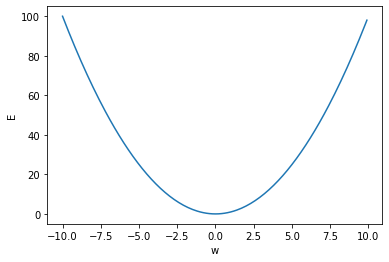

In [87]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, w):
    dw = 0.0001
    return (f(w+dw) - f(w)) / dw

def loss_function(w):
    return w**2

w = np.arange(-10., 10., 0.1)
y = loss_function(w)

plt.xlabel('w')
plt.ylabel('E')
plt.plot(w, y)
plt.show()

In [95]:
# 좌하향 손실함수 그래프
lr = 0.1

update_w = 5

grad = numerical_diff(loss_function, update_w)
print('grad:', format(grad, '.3f'))
update_w -= lr*grad
print('update_w:', update_w)

grad = numerical_diff(loss_function, update_w)
print('grad:', format(grad, '.3f'))
update_w -= lr*grad
print('update_w:', update_w)

grad = numerical_diff(loss_function, update_w)
print('grad:', format(grad, '.3f'))
update_w -= lr*grad
print('update_w:', update_w)


grad: 10.000
update_w: 3.999990000001503
grad: 8.000
update_w: 3.199982000004482
grad: 6.400
update_w: 2.5599756000033125


In [96]:
# 우하향 손실함수 그래프
lr = 0.1

update_w = -5

grad = numerical_diff(loss_function, update_w)
print('grad:', format(grad, '.3f'))
update_w -= lr*grad
print('update_w:', update_w)

grad = numerical_diff(loss_function, update_w)
print('grad:', format(grad, '.3f'))
update_w -= lr*grad
print('update_w:', update_w)

grad = numerical_diff(loss_function, update_w)
print('grad:', format(grad, '.3f'))
update_w -= lr*grad
print('update_w:', update_w)


grad: -10.000
update_w: -4.000010000003158
grad: -8.000
update_w: -3.200017999998579
grad: -6.400
update_w: -2.560024399996692


In [88]:
w25 = numerical_diff(loss_function, 2.5)
print(format(w25, '.3f'))

10.000
5.000
